In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
import pandas as pd
import itertools
import importlib
import mlintro_min as mli

In [2]:
%matplotlib inline

# Simple regression (OLS) model

Range of cannon angle psi to investigate

In [5]:
psi_min=20
psi_max=60

Read pre-generated source of data

In [7]:
ref_df = pd.read_csv('datasets/offline/refdata_100K.csv')
# Get a very small subset of inter-spread data for plotting
ref_df_light = mli.get_ref_light(ref_df, psi_min=psi_min, psi_max=psi_max)

Generate a single dataset of 50 observations

In [8]:
np.random.seed(42)
ds = mli.get_datasets(ref_df, n_datasets=1, sample_size=50, 
                      psi_min=psi_min, psi_max=psi_max)[0]

##### Explore dataset

We are only interested in experimental measures of angle and range, `exp_angle` and `exp_range` respectively

In [9]:
ds

,true_angle,true_range,exp_angle,exp_range
55636,49.50156,73.748791,49.290586,76.708848
44400,41.52400,75.088014,42.412220,75.295328
65098,56.21958,68.648328,57.074914,69.804508
41969,39.79799,74.685302,38.595105,75.658031
41793,39.67303,74.646496,39.682778,74.806822
59123,51.97733,72.281949,52.628698,74.684523
46465,42.99015,75.235254,42.404804,78.694761
19928,24.14888,59.709266,24.658375,57.858609
58580,51.59180,72.542447,52.329337,72.761539
60167,52.71857,71.748129,53.935456,72.957270


### Exercise 
Plot the (experimentally) measured range `exp_range` as a function of the (experimentally) measured angle `exp_angle`, once with matplotlib `plt.scatter()` function, and once with seaborn `sns.scatterplot()` function.  

* HINT 1: look at the functions help to know which function arguments to use
* HINT 2: you can call these functions in two ways:
  * either extract the columns you want to plot and give them as parameters `x` and `y`, OR
  * just provide the column names as arguments for `x` and `y`,  and provide the dataframe name as argument to the parameter `data`. This approach is preferred.
* HINT 3: if using the first method mentioned in HINT 2, remember you can extract a column from a dataframe either as a single column `pandas` object called a `Series` with `[ ]`, or as a `DataFrame` object with `[[ ]]`

### Solution

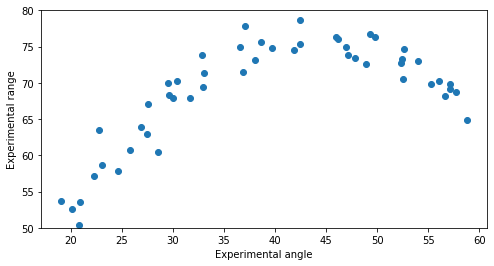

In [86]:
# With maplotlib package scatter function
plt.figure(figsize=(8, 4))
plt.scatter(x="exp_angle", y="exp_range", data=ds)
plt.xlabel("Experimental angle")
plt.ylabel("Experimental range")
plt.ylim([50, 80]);

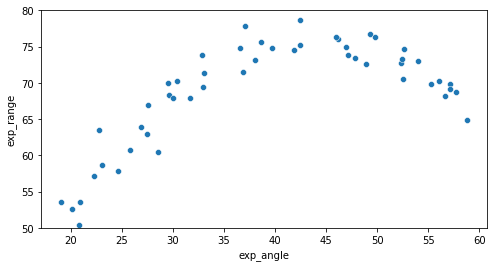

In [87]:
# With seaborn package scatterplot function (x and y labels added automatically)
plt.figure(figsize=(8, 4))
sns.scatterplot(x="exp_angle", y="exp_range", data=ds)
plt.ylim([50, 80]);

## Part 1: model selection with train / test split

We will compare three models of different complexity (different number of parameters):
   * Standard linear model (2 parameters: $\beta_0$, $\beta_\psi$)
   * Linear model with the feature squared (3 parameters: $\beta_0$, $\beta_\psi$, $\beta_{\psi^2}$)
   * Linear model with up to $5^{th}$ power of feature (6 parameters: $\beta_0$, $\beta_\psi$, $\beta_{\psi^2}$, $\beta_{\psi^3}$, $\beta_{\psi^4}$, $\beta_{\psi^5}$)

In [17]:
from sklearn.model_selection import train_test_split

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

Let's divide our dataset into training and test set !

In [18]:
X = ds[['exp_angle']]
y = ds[['exp_range']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
print(f"Number of observations: {len(X_train)} for training and {len(X_test)} for testing")

Number of observations: 30 for training and 20 for testing


In [19]:
# We simply used tuple unpacking
a, b, c = (1, 13, 42)
print(f'a={a}, b={b}, c={c}')

a=1, b=13, c=42


In [25]:
X_test

,exp_angle
29949,29.514327
28920,29.596307
66264,57.091815
29089,30.016531
61234,52.466343
15021,20.799493
55540,48.872826
65801,56.605909
38528,37.080220
18699,22.225126


### Linear (OLS) model with single feature

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

##### Let's train the model

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Create new estimator object (each model is an object in `sklearn`)

In [27]:
lm = LinearRegression()

In [ ]:
lm.

In [28]:
lm.fit(X_train, y_train)

LinearRegression()

In [29]:
lm?

In [30]:
print(f'beta_psi: {lm.coef_}, beta_0: {lm.intercept_}')

beta_psi: [[0.38340895]], beta_0: [53.14568672]


##### Predict, and compute performance scores

In [31]:
lm.predict([[30], [45], [60]])

array([[64.64795508],
       [70.39908926],
       [76.15022345]])

The training score can provide an idea of best possible performance

In [32]:
# We score the predictions made on the same data we trained on
y_pred = lm.predict(X_train)

R2_train = r2_score(y_train, y_pred)
MSE_train = mean_squared_error(y_train, y_pred)
print(f'lm training performance is R2: {R2_train:0.2f} and MSE: {MSE_train:0.2f}')

lm training performance is R2: 0.47 and MSE: 27.38


`R2` can be obtained directly from the model / estimator object as it is the default for `LinearRegression`

In [185]:
lm.score(X_train, y_train)

0.4733701964386373

Let's save all our models scores to compare models later

In [33]:
train_test_results = []
train_test_results.append({'model': 'lm', 'stage': 'train', 
                           'scorer': 'r2', 'val': R2_train})
train_test_results.append({'model': 'lm', 'stage': 'train', 
                           'scorer': 'MSE', 'val': -MSE_train})

##### Let's test on unseen data and get testing score

See possible scores: https://scikit-learn.org/stable/modules/model_evaluation.html

The testing score can provide an idea of performance for unseen data

### Exercise
Let's use the fitted model to see its performance on unseen data. As above, use the `lm.predict()`, `r2_score()` and `mean_squared_error()` functions, but this time to get the scores on the unseen data `X_test`. The predictions of `X_test` have to be compared with the ground truth data `y_test`.
* HINT 1: copy the relevant code, and replace the training data with the testing data where required
* HINT 2: you should find as performance R2: 0.26 and MSE: 33.05

### Solution

In [34]:
# We score predictions made on unseen data (from our model fitted on our training data)
y_pred = lm.predict(X_test)

R2_test = r2_score(y_test, y_pred)
MSE_test = mean_squared_error(y_test, y_pred)
print(f'lm training performance is R2: {R2_test:0.2f} and MSE: {MSE_test:0.2f}')

lm training performance is R2: 0.26 and MSE: 33.05


Again let's save our scores for comparison later

In [35]:
train_test_results.append({'model': 'lm', 'stage': 'test', 
                           'scorer': 'r2', 'val': R2_test})
train_test_results.append({'model': 'lm', 'stage': 'test', 
                           'scorer': 'MSE', 'val': -MSE_test})

### Polynomial degree 2 model (polynomial use feature powers as additional features)

##### Train and get training score of degree 2 polynomial

The polynomial terms are created and then added to a standard `LinearRegression`

In [36]:
from sklearn.preprocessing import PolynomialFeatures

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

In [37]:
poly_transformer = PolynomialFeatures(degree=2)
lm_deg2 = LinearRegression()

A polynomial model is fitted by first transforming the features and then training a `LinearRegression` on the transformed features

In [38]:
X_train_deg2 = poly_transformer.fit_transform(X_train)

In [43]:
X_train_deg2

array([[1.00000000e+00, 5.39354559e+01, 2.90903340e+03],
       [1.00000000e+00, 3.28354531e+01, 1.07816698e+03],
       [1.00000000e+00, 2.08485347e+01, 4.34661399e+02],
       [1.00000000e+00, 5.60480002e+01, 3.14137832e+03],
       [1.00000000e+00, 3.80667523e+01, 1.44907763e+03],
       [1.00000000e+00, 4.92905859e+01, 2.42956186e+03],
       [1.00000000e+00, 5.76756034e+01, 3.32647522e+03],
       [1.00000000e+00, 3.65398293e+01, 1.33515913e+03],
       [1.00000000e+00, 5.87840026e+01, 3.45555896e+03],
       [1.00000000e+00, 5.26286977e+01, 2.76977982e+03],
       [1.00000000e+00, 5.52333414e+01, 3.05072201e+03],
       [1.00000000e+00, 2.57757690e+01, 6.64390269e+02],
       [1.00000000e+00, 3.68614775e+01, 1.35876852e+03],
       [1.00000000e+00, 4.24122201e+01, 1.79879641e+03],
       [1.00000000e+00, 2.74364029e+01, 7.52756204e+02],
       [1.00000000e+00, 5.70749141e+01, 3.25754582e+03],
       [1.00000000e+00, 2.75235035e+01, 7.57543245e+02],
       [1.00000000e+00, 2.85425

In [45]:
lm_deg2.fit(X_train_deg2, y_train)

LinearRegression()

In [46]:
lm_deg2.coef_

array([[ 0.        ,  3.34282668, -0.03760496]])

Let's compute training score  
**Warning**: `LinearRegression` needs to be applied to the *transformed* (polynomial) features

In [47]:
y_pred = lm_deg2.predict(X_train_deg2)

R2_train = r2_score(y_train, y_pred)
MSE_train = mean_squared_error(y_train, y_pred)
print(f'poly deg2 training performance is R2: {R2_train:0.2f} and MSE: {MSE_train:0.2f}')

poly deg2 training performance is R2: 0.91 and MSE: 4.42


In [48]:
train_test_results.append({'model': 'lm_deg2', 'stage': 'train', 
                           'scorer': 'r2', 'val': R2_train})
train_test_results.append({'model': 'lm_deg2', 'stage': 'train', 
                           'scorer': 'MSE', 'val': -MSE_train})

##### Let's test on unseen data and get testing score

Again, should not forget to transform the test data to get polynomial features

In [49]:
X_test_deg2 = poly_transformer.fit_transform(X_test) 

y_pred = lm_deg2.predict(X_test_deg2)

R2_test = r2_score(y_test, y_pred)
MSE_test = mean_squared_error(y_test, y_pred)
print(f'poly deg2 testing performance is R2: {R2_test:0.2f} and MSE: {MSE_test:0.2f}')

poly deg2 testing performance is R2: 0.91 and MSE: 4.20


In [50]:
train_test_results.append({'model': 'lm_deg2', 'stage': 'test', 
                           'scorer': 'r2', 'val': R2_test})
train_test_results.append({'model': 'lm_deg2', 'stage': 'test', 
                           'scorer': 'MSE', 'val': -MSE_test})

### Polynomial degree 5 model, introducing pipeline object

It is common to use preprocessing steps such as features transformation. To avoid repeating these processing steps (e.g. when testing the model on new data) the `Pipeline` object is very useful. It builds a workflow which can be called with a single command. 

##### Train and get training score of degree 5 polynomial with *pipeline*

In [51]:
from sklearn.pipeline import Pipeline

https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

The creation of the polynomial terms are embed in the `Pipeline` object which represents our new estimator (i.e. the one to use with `fit`, `predict`, etc.)

In [52]:
lm_deg5 = Pipeline([('poly_transformer', PolynomialFeatures(degree=5)),
                    ('lm', LinearRegression())])

### Exercise
Train and test your "degree 5"-polynomial model, and get both the training and testing scores (R2 and MSE).  
1. Fit  your pipeline model on `X_train` and `y_train` with the `lm_deg5.fit()` method (you only need to call this method because the pipeline object will take care of calling the required `transform` and `fit` methods of all the pipeline objects)
2. Examine your fitted linear model coefficients. Because your model is a pipeline object including `poly_transformer` and `lm`, you have to look at the specific `lm` object accessible with `lm_deg5['lm']` 
3. Compute the R2 and MSE training score by comparing predictions on `X_train` (you can name them `y_pred`) with the ground truth `y_train`, and save them in the variables `R2_train` and `MSE_train` respectively
4. Run the cell further down below to append the training scores to the `train_test_results` variable
5. Using the fitted model on step 1, now compute the R2 and MSE testing scores by comparing predictions on `X_test` with `y_test`, and save them in the variables `R2_test` and `MSE_test` respectively
6. Run the cell further down below to append the test scores to the `train_test_results` variable

HINT: Copy previous code and adapt it as needed

### Solution

1. The pipeline object will call each of its component in turn, so we only need to call `fit` on the pipeline itself

In [53]:
lm_deg5.fit(X_train, y_train)

Pipeline(steps=[('poly_transformer', PolynomialFeatures(degree=5)),
                ('lm', LinearRegression())])

2. We can access a particular Pipeline component in the same way we access the value of a dictionary. In this case we want the component we called `lm`, and once we have the `lm` object we get its `coef_` attributes.

In [54]:
lm_deg5['lm'].coef_

array([[ 0.00000000e+00, -9.32453755e+00,  6.36664599e-01,
        -1.79426599e-02,  2.39523999e-04, -1.27777210e-06]])

In [88]:
# Alternative
lm_estimator = lm_deg5['lm']
lm_estimator.coef_

array([[ 0.00000000e+00, -9.32453755e+00,  6.36664599e-01,
        -1.79426599e-02,  2.39523999e-04, -1.27777210e-06]])

3. Again we can directly call the `predict` method of the pipeline object, which will take care of first running the polynomial transformer (to get all the powers of the angle) and then the `lm` estimator.

In [59]:
y_pred = lm_deg5.predict(X_train)

In [60]:
R2_train = r2_score(y_train, y_pred)
MSE_train = mean_squared_error(y_train, y_pred)

4. Saving all the results in the list of dictionaries `train_test_results` which will be helpful for plotting

In [63]:
train_test_results.append({'model': 'lm_deg5', 'stage': 'train', 
                           'scorer': 'r2', 'val': R2_train})
train_test_results.append({'model': 'lm_deg5', 'stage': 'train', 
                           'scorer': 'MSE', 'val': -MSE_train})

5. Similar to previous question but using the test data on the **already fitted** model

In [61]:
# Predictions on test data
y_pred = lm_deg5.predict(X_test)

In [62]:
R2_test = r2_score(y_test, y_pred)
MSE_test = mean_squared_error(y_test, y_pred)

6. Saving all the results in the list of dictionaries `train_test_results` which will be helpful for plotting

In [64]:
train_test_results.append({'model': 'lm_deg5', 'stage': 'test', 
                           'scorer': 'r2', 'val': R2_test})
train_test_results.append({'model': 'lm_deg5', 'stage': 'test', 
                           'scorer': 'MSE', 'val': -MSE_test})

##### Plot all the results

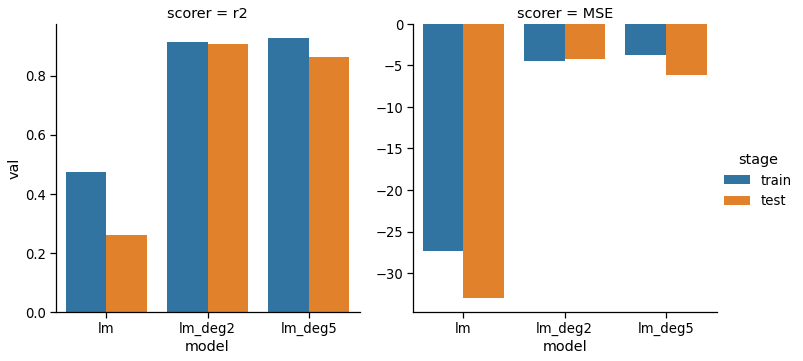

In [89]:
# The list of dictionaries is transformed into a Pandas dataframe
train_test_results_df = pd.DataFrame(train_test_results)
# We extract the r2 score results
r2_results = train_test_results_df.loc[train_test_results_df['scorer'] == 'r2']
# We extract the MSE score results
MSE_results = train_test_results_df.loc[train_test_results_df['scorer'] == 'MSE']
# We call the seaborn `catplot` function which can plot 4 level of informations:
# x [model: lm, lm_deg2, ...], y [score value], colored by `hue` [training or testing score], 
# and producing separate plots for each `col` [score metric: r2 or MSE]
with sns.plotting_context("notebook", font_scale=1.2):
    g = sns.catplot(x="model", y="val", hue="stage", col="scorer", 
                    data=train_test_results_df, kind="bar", sharey=False)

For many other regression models implemented in sklearn, cf https://scikit-learn.org/stable/supervised_learning.html#supervised-learning 

## Part 2: Model selection with cross-validation

https://scikit-learn.org/stable/modules/cross_validation.html

In [66]:
from sklearn.model_selection import KFold

In [67]:
KFold?

Let's see what K fold is actually doing on a 10-observation dataset

In [68]:
X_example = pd.DataFrame({'obs': 
                          np.random.randint(0, 1000, 10)})
X_example

,obs
0,615
1,76
2,314
3,10
4,892
5,50
6,6
7,922
8,954
9,548


In [69]:
kf = KFold(n_splits=5)
for (ix_train, ix_test) in kf.split(X_example):
    print("train ix:", ix_train, "testix:", ix_test)

train ix: [2 3 4 5 6 7 8 9] testix: [0 1]
train ix: [0 1 4 5 6 7 8 9] testix: [2 3]
train ix: [0 1 2 3 6 7 8 9] testix: [4 5]
train ix: [0 1 2 3 4 5 8 9] testix: [6 7]
train ix: [0 1 2 3 4 5 6 7] testix: [8 9]


In [223]:
kfs = KFold(n_splits=5, shuffle=True, random_state=42)
for (ix_train, ix_test) in kfs.split(X_example):
    print("train ix:", ix_train, "test ix:", ix_test)

train ix: [0 2 3 4 5 6 7 9] test ix: [1 8]
train ix: [1 2 3 4 6 7 8 9] test ix: [0 5]
train ix: [0 1 3 4 5 6 8 9] test ix: [2 7]
train ix: [0 1 2 3 5 6 7 8] test ix: [4 9]
train ix: [0 1 2 4 5 7 8 9] test ix: [3 6]


In [70]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
print(f"Size X: {len(X)}, with X train: {len(X_train)} and X test: {len(X_test)}")

Size X: 50, with X train: 30 and X test: 20


In [71]:
ml_models = {'lm': LinearRegression(),
             'lm_deg2': Pipeline([('poly_transformer', PolynomialFeatures(degree=2)),
                                  ('lm', LinearRegression())]),
             'lm_deg5': Pipeline([('poly_transformer', PolynomialFeatures(degree=5)),
                                  ('lm', LinearRegression())])}

In [226]:
#from sklearn.model_selection import StratifiedKFold

In [72]:
kf_results = []

kfs = KFold(n_splits=10, shuffle=True, random_state=42)
for i_f, (ix_train, ix_test) in enumerate(kfs.split(X_train)):
    # Loop over models
    for mod_name, mod in ml_models.items():
        # Define training and testing folds
        X_training_folds = X_train.iloc[ix_train]
        y_training_folds = y_train.iloc[ix_train]
        X_test_fold = X_train.iloc[ix_test]
        y_test_fold = y_train.iloc[ix_test]
        # Fit the model on the training folds
        mod.fit(X_training_folds, y_training_folds)
        # Test on both the training and testing folds to check for over-/under-fitting
        y_pred_train = mod.predict(X_training_folds)
        y_pred_test = mod.predict(X_test_fold)
        # R2
        kf_results.append({'model': mod_name, 'fold': i_f, 'stage': 'train', 'scorer': 'r2', 
                           'val': r2_score(y_training_folds, y_pred_train)})
        kf_results.append({'model': mod_name, 'fold': i_f, 'stage': 'test', 'scorer': 'r2', 
                           'val': r2_score(y_test_fold, y_pred_test)})
        # MSE
        kf_results.append({'model': mod_name, 'fold': i_f, 'stage': 'train', 'scorer': 'MSE', 
                           'val': -mean_squared_error(y_training_folds, y_pred_train)})
        kf_results.append({'model': mod_name, 'fold': i_f, 'stage': 'test', 'scorer': 'MSE', 
                           'val': -mean_squared_error(y_test_fold, y_pred_test)})
kf_results_df = pd.DataFrame(kf_results)

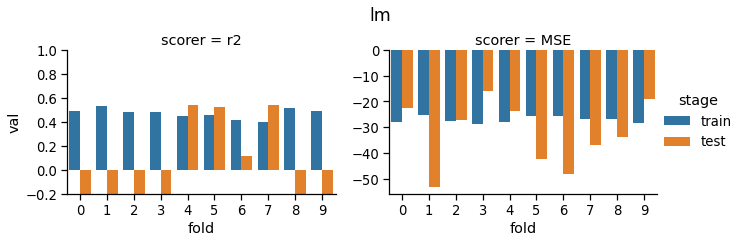

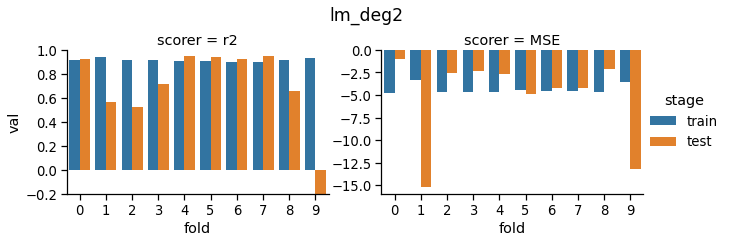

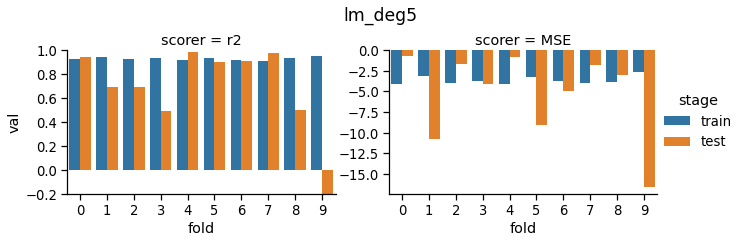

In [73]:
for mod_name in ml_models.keys():
    kf_df = kf_results_df.loc[kf_results_df['model'] == mod_name]
    with sns.plotting_context("notebook", font_scale=1.2):
        g = sns.catplot(x="fold", y="val", hue="stage", col="scorer", data=kf_df, 
                        kind="bar", sharey=False, height=3, aspect=1.5)
        g.axes[0,0].set_ylim(-0.2,1)
        #g.axes[0,1].set_ylim(0, 45)
        g.fig.suptitle(mod_name, y=1.05)

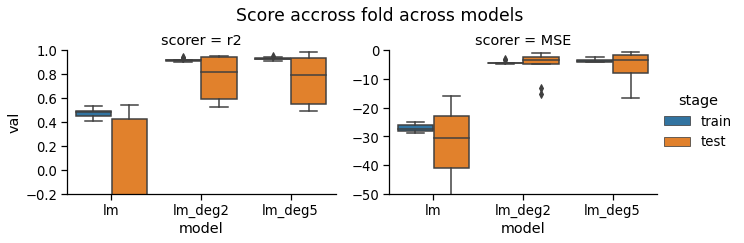

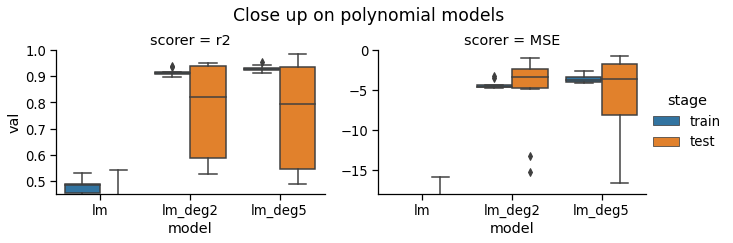

In [74]:
with sns.plotting_context("notebook", font_scale=1.2):
    g = sns.catplot(x="model", y="val", hue="stage", col="scorer", data=kf_results_df, 
                    kind="box", sharey=False, height=3, aspect=1.5)
    g.axes[0, 0].set_ylim(-0.2, 1)
    g.axes[0, 1].set_ylim(-50, 0)
    g.fig.suptitle("Score accross fold across models", y=1.05)
    g = sns.catplot(x="model", y="val", hue="stage", col="scorer", data=kf_results_df, 
                    kind="box", sharey=False, height=3, aspect=1.5)
    g.axes[0, 0].set_ylim(0.45, 1)
    g.axes[0, 1].set_ylim(-18, 0)
    g.fig.suptitle("Close up on polynomial models", y=1.05)

#### `sklearn` helps to automate common operations 

In [75]:
from sklearn.model_selection import cross_val_score

In [236]:
cross_val_score?

In [76]:
from sklearn.metrics import fbeta_score, make_scorer
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

In [77]:
ml_models = {'lm': LinearRegression(),
             'lm_deg2': Pipeline([('poly_transformer', PolynomialFeatures(degree=2)),
                                  ('lm', LinearRegression())]),
             'lm_deg5': Pipeline([('poly_transformer', PolynomialFeatures(degree=5)),
                                  ('lm', LinearRegression())])}
# Get cv train AND test scores
cv_test_scores = {}
for mod_name in ml_models.keys():
    cv_test_scores[mod_name] = cross_val_score(ml_models[mod_name], X_train, y_train, 
                                               cv=kfs, scoring=mse_scorer, n_jobs=-1)
cv_test_scores_df = pd.DataFrame(cv_test_scores)

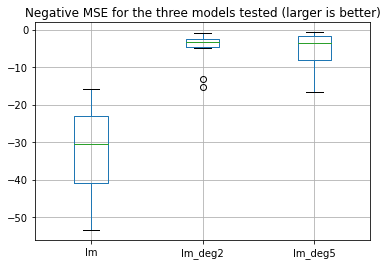

In [78]:
cv_test_scores_df.boxplot()
plt.title('Negative MSE for the three models tested (larger is better)');

##### Want even more with even less code?

In [79]:
from sklearn.model_selection import cross_validate

`cross_validate` returns train *and* test scores on *several* metrics

In [80]:
cross_validate?

In [81]:
ml_models = {'lm': LinearRegression(),
             'lm_deg2': Pipeline([('poly_transformer', PolynomialFeatures(degree=2)),
                                  ('lm', LinearRegression())]),
             'lm_deg5': Pipeline([('poly_transformer', PolynomialFeatures(degree=5)),
                                  ('lm', LinearRegression())])}
# Get cv train AND test scores
cv_scores = {}
for mod_name in ml_models.keys():
    cv_scores[mod_name] = cross_validate(ml_models[mod_name], X_train, y_train, cv=kfs, 
                                         scoring=['r2', 'neg_mean_squared_error'], 
                                         return_train_score=True, n_jobs=-1)

In [82]:
def crossval_to_df(cv_dict):
    crossval_results = []
    for model in cv_dict.keys():
        for scorer in cv_dict[model].keys():
            if scorer.startswith('train_'):
                score = scorer.replace('train_', '')
                for i_val, val in enumerate(cv_dict[model][scorer]):
                    crossval_results.append({'model': model, 'fold': i_val, 'stage': 'train', 
                                             'scorer': score, 'val': val})
            elif scorer.startswith('test_'):
                score = scorer.replace('test_', '')
                for i_val, val in enumerate(cv_dict[model][scorer]):
                    crossval_results.append({'model': model, 'fold': i_val, 'stage': 'test', 
                                             'scorer': score, 'val': val})
    return pd.DataFrame(crossval_results)

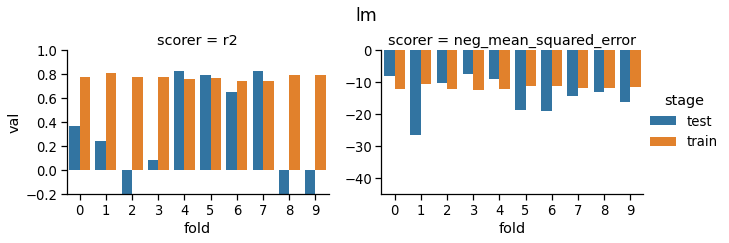

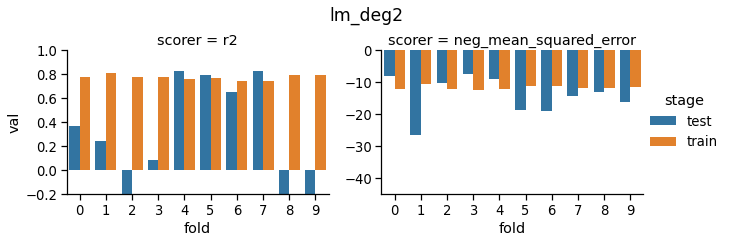

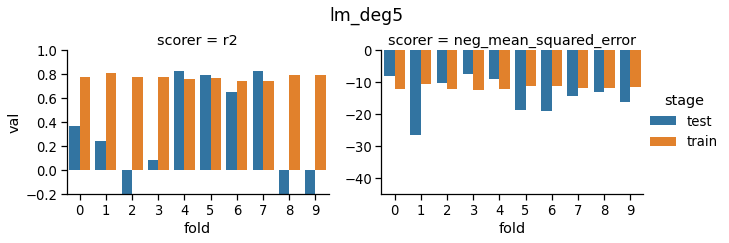

In [83]:
crossval_df = crossval_to_df(cv_scores)
for mod_name in crossval_df['model'].unique():
    kf_df = crossval_df.loc[crossval_df['model'] == mod_name]
    with sns.plotting_context("notebook", font_scale=1.2):
        g = sns.catplot(x="fold", y="val", hue="stage", col="scorer", data=crossval_df,
                        kind="bar", sharey=False, height=3, aspect=1.5, ci=None)
        g.axes[0,0].set_ylim(-0.2,1)
        g.axes[0,1].set_ylim(-45, 0)
        g.fig.suptitle(mod_name, y=1.05)